- Hypothesis test
- Comment on power, sample size
- Maximised sample size to improve results

Price
Highest and Lowest Number of Cars - ('Bromley', 'Barking and Dagenham')

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import data_cleaning as dc
import api
from scipy import stats
from scipy.stats import norm

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Import DF
df = dc.full_clean()

In [4]:
#Call API for each City
Bro = api.get_place_aqi(df, 'Bromley',100)
Bro = np.asarray(Bro)
len(Bro)

198

In [5]:
Bar = api.get_place_aqi(df, 'Barking and Dagenham',100)
Bar = np.asarray(Bar)
len(Bar)

198

In [6]:
x1 = Bro
x2 = Bar

In [7]:
# Find mean, variance and standard deviation of each sample
def sample_mu_std_var(sample):
    mean = np.mean(sample)
    std = np.std(sample)
    var = np.var(sample)
    return mean, std, var

In [8]:
sample_mu_std_var(x1), sample_mu_std_var(x2)

((71.22727272727273, 9.152681543169212, 83.77157943067034),
 (78.75757575757575, 8.896249248346475, 79.14325068870524))

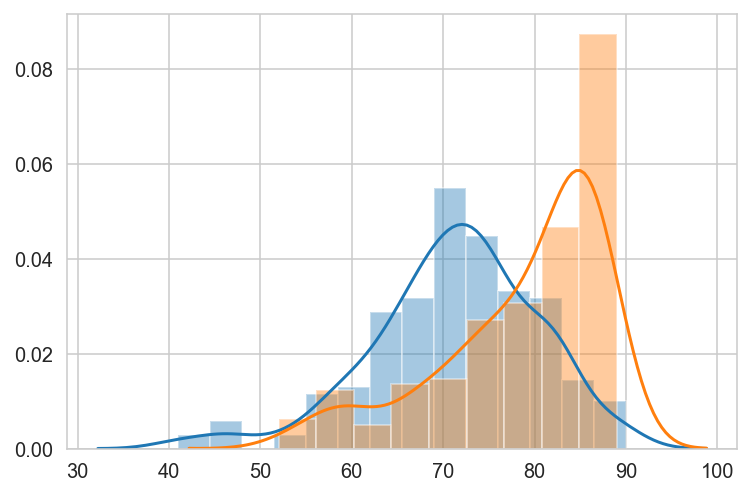

In [9]:
#Visually inspecting the distributions for differences in mean and standard deviation
sns.distplot(x1), sns.distplot(x2);

In [10]:
#Finding the critical T Value and P Value
def twosample_tstatistic(sample1, sample2):
    stat = stats.ttest_ind(sample1, sample2, equal_var = False)
    return stat

two_t = twosample_tstatistic(x1, x2)
t_stat = two_t.statistic
p_val = two_t.pvalue
print('T-Stat: ',t_stat, ' P-Val: ',p_val)

T-Stat:  -8.280665781990221  P-Val:  1.9325066770543864e-15
